# Importing libraries and Model

In [1]:
import os
from fastai.vision.all import *
from PIL import Image
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageWin
from IPython.display import display, Image, HTML

In [2]:
path = Path('insectaCamModel.pkl')
learn = load_learner(path)

# File selector

File selected: C:/Users/menga/Documents/Code/InsectaCam/type_insect/Lucila/luciala 1 (14).png
Parent folder: Lucila


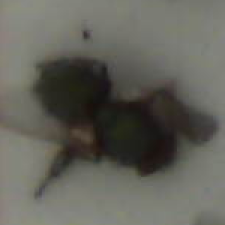

C:\Users\menga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


Probability for Lucila: 1.0000
Probability for Mosca Domestica: 0.0000
Probability for Piofila: 0.0000







In [3]:
def choose_file():
    file_path = filedialog.askopenfilename(title="Choose a file", filetypes=[
                                           ("Image files", "*.png;*.jpg;*.jpeg;*.gif")])
    entry_path.delete(0, tk.END)
    entry_path.insert(0, file_path)
    # Aggiungi questa linea per utilizzare il percorso del file selezionato
    process_file(file_path)


def print_image(file_path):
    try:
        # Visualizza l'immagine
        display(Image(filename=file_path))
    except Exception as e:
        print(f"Error: {e}")


def parent_folder(file_path):
    try:
        folder = os.path.basename(os.path.dirname(file_path))
        return folder
    except Exception as e:
        print(f"Errore durante l'ottenimento della cartella: {e}")
        return None


def process_file(file_path):
    print("File selected:", file_path)
    print("Parent folder:", parent_folder(file_path))
    print_image(file_path)
    is_mosquito, _, probs = learn.predict(
        PILImage.create(file_path))  # Esegui la previsione
    # Stampa le probabilità per ogni classe
    print(f"Probability for Lucila: {probs[0]:.4f}")
    print(f"Probability for Mosca Domestica: {probs[1]:.4f}")
    print(f"Probability for Piofila: {probs[2]:.4f}")
    print("\n\n\n\n")


# Creazione della finestra principale
root = tk.Tk()
root.title("Choose a file")

# Creazione di un campo di testo per visualizzare il percorso del file
entry_path = tk.Entry(root, width=50)
entry_path.pack(pady=10)

# Creazione di un pulsante per aprire la finestra di esplora risorse
btn_browse = tk.Button(root, text="Sfoglia", command=choose_file)
btn_browse.pack(pady=10)

# Avvio della finestra principale
root.mainloop()